In [6]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
states = gpd.read_file('India Shape/india_ds.shp')
literacy = pd.read_csv("GOI.csv")
literacy.head()

merged = states.merge(literacy, how='left', left_on='STATE', right_on='Country/ States/ Union Territories Name')

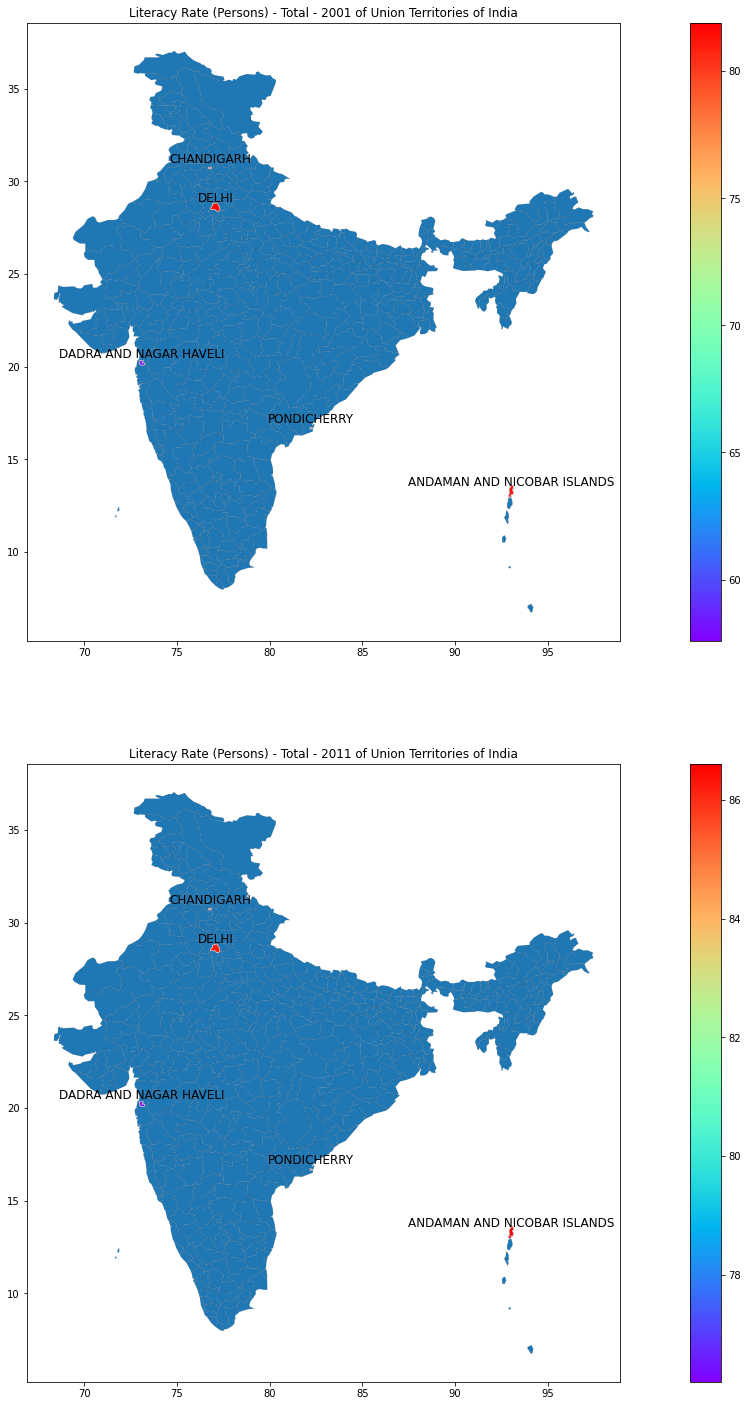

In [8]:
union_ter = merged[merged['Category']=='Union Territory'].head()

fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

plotted_labels=[]
for x, y, label in zip(union_ter.geometry.centroid.x, union_ter.geometry.centroid.y, union_ter['STATE']):
  if label not in plotted_labels:
    ax.text(x, y+0.5, label, fontsize=12, ha='center', va='center')
    ax1.text(x, y+0.5, label, fontsize=12, ha='center', va='center')
    plotted_labels.append(label)

merged.plot(linewidth=0.1, ax=ax, edgecolor='0.2', legend=True)
union_ter.plot(column='Literacy Rate (Persons) - Total - 2001', cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title("Literacy Rate (Persons) - Total - 2001 of Union Territories of India")

merged.plot(linewidth=0.1, ax=ax1, edgecolor='0.2', legend=True)
union_ter.plot(column='Literacy Rate (Persons) - Total - 2011', cmap='rainbow', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)

ax1.set_title("Literacy Rate (Persons) - Total - 2011 of Union Territories of India")
plt.show()

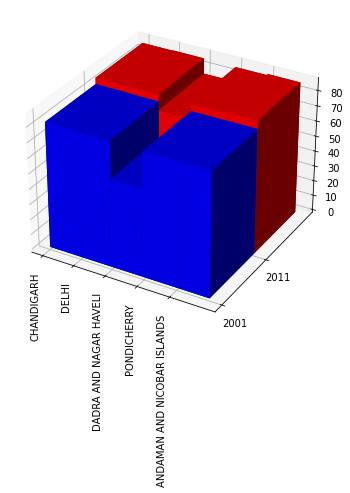

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(union_ter['STATE']))
y = np.array([0]*len(union_ter['STATE']))
z = np.array([0]*len(union_ter['STATE']))

dx = np.ones(len(union_ter['STATE']))
dy = np.ones(len(union_ter['STATE']))
dz2001 = union_ter['Literacy Rate (Persons) - Total - 2001']
dz2011 = union_ter['Literacy Rate (Persons) - Total - 2011']

ax.bar3d(x, y, z, dx, dy, dz2001, color='b', zsort='average')
ax.bar3d(x, y+1, z, dx, dy, dz2011, color='r', zsort='average')

ax.set_xticks(x)
ax.set_xticklabels(union_ter['STATE'], rotation=90)
ax.set_yticks([0, 1])
ax.set_yticklabels(['2001', '2011'])

plt.show()

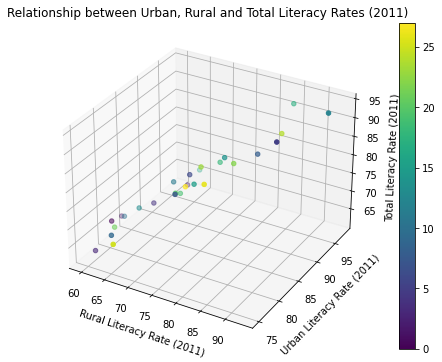

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_states = literacy[literacy['Category'] == 'State']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a sequence of numbers for coloring
colors = np.arange(len(df_states))

scatter = ax.scatter(df_states['Literacy Rate (Persons) - Rural - 2011'], 
                     df_states['Literacy Rate (Persons) - Urban - 2011'], 
                     df_states['Literacy Rate (Persons) - Total - 2011'], 
                     c=colors, cmap='viridis')

ax.set_title('Relationship between Urban, Rural and Total Literacy Rates (2011)')
ax.set_xlabel('Rural Literacy Rate (2011)')
ax.set_ylabel('Urban Literacy Rate (2011)')
ax.set_zlabel('Total Literacy Rate (2011)')

fig.colorbar(scatter)

plt.show()

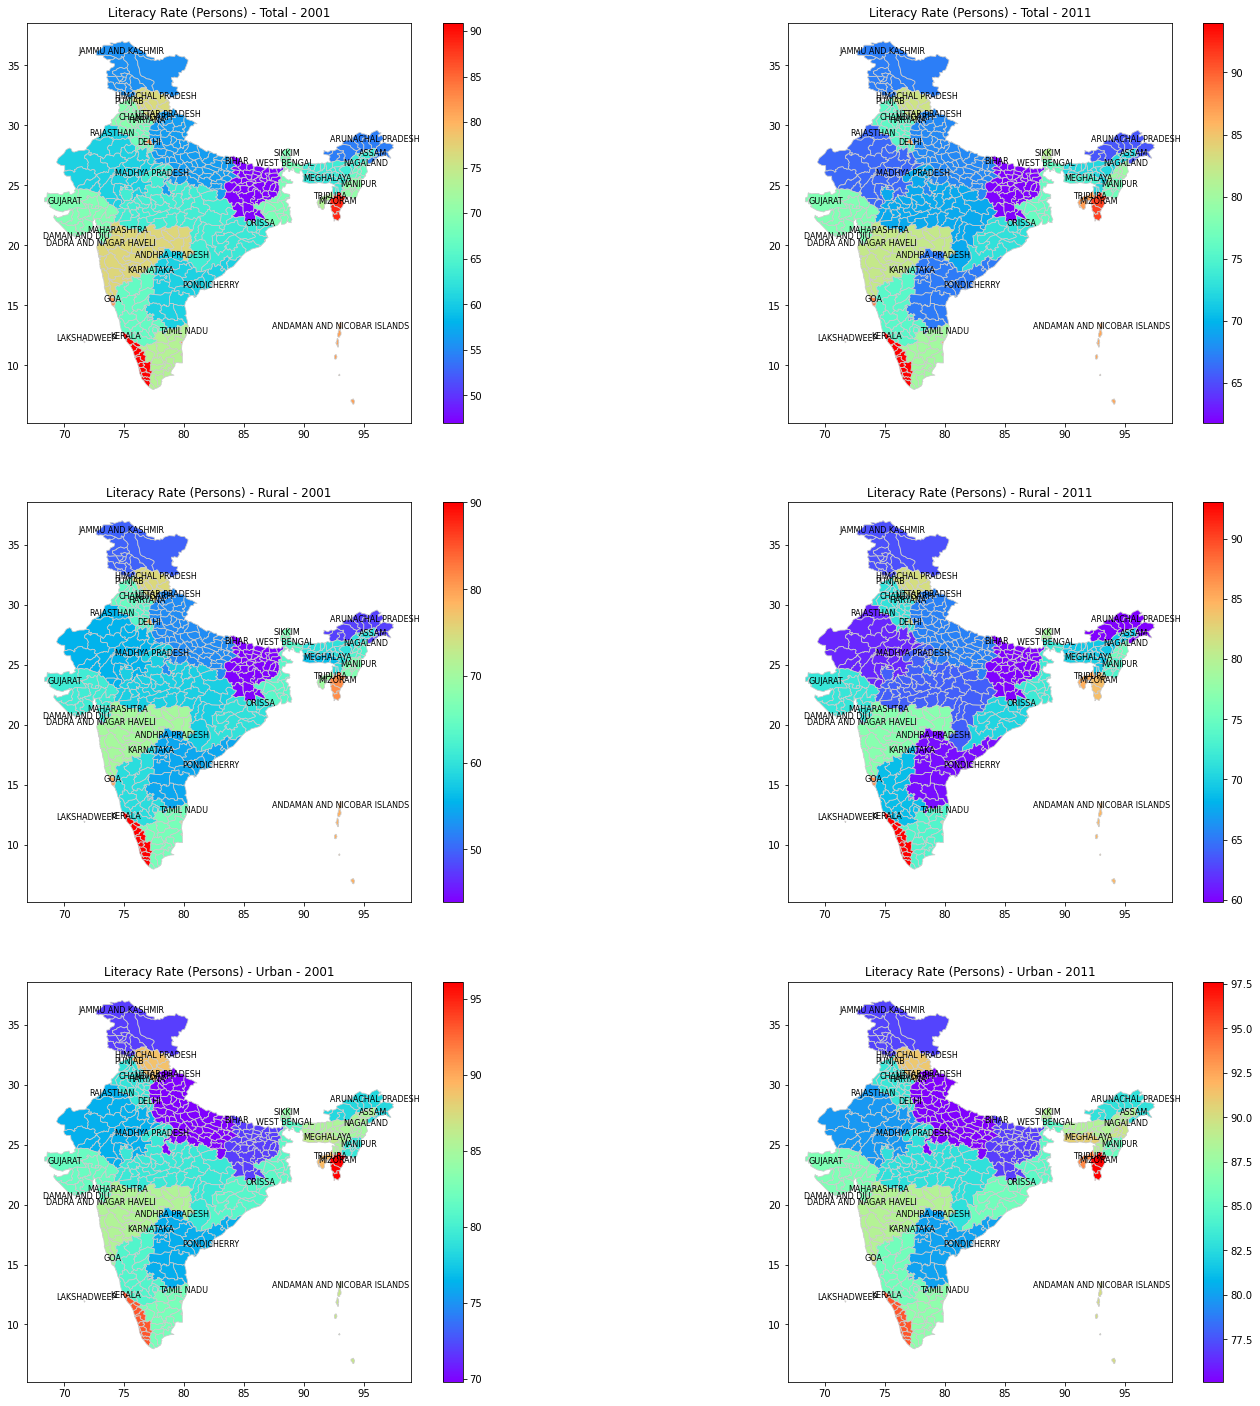

In [ ]:
fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

plotted_labels=[]
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE']):
  if label not in plotted_labels:
    ax1.text(x, y, label, fontsize=8, ha='center', va='center')
    ax2.text(x, y, label, fontsize=8, ha='center', va='center')
    ax3.text(x, y, label, fontsize=8, ha='center', va='center')
    ax4.text(x, y, label, fontsize=8, ha='center', va='center')
    ax5.text(x, y, label, fontsize=8, ha='center', va='center')
    ax6.text(x, y, label, fontsize=8, ha='center', va='center')
    plotted_labels.append(label)

merged.plot(column='Literacy Rate (Persons) - Total - 2001', cmap='rainbow', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title("Literacy Rate (Persons) - Total - 2001")

merged.plot(column='Literacy Rate (Persons) - Total - 2011', cmap='rainbow', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title("Literacy Rate (Persons) - Total - 2011")

merged.plot(column='Literacy Rate (Persons) - Rural - 2001', cmap='rainbow', linewidth=0.8, ax=ax3, edgecolor='0.8', legend=True)
ax3.set_title("Literacy Rate (Persons) - Rural - 2001")

merged.plot(column='Literacy Rate (Persons) - Rural - 2011', cmap='rainbow', linewidth=0.8, ax=ax4, edgecolor='0.8', legend=True)
ax4.set_title("Literacy Rate (Persons) - Rural - 2011")

merged.plot(column='Literacy Rate (Persons) - Urban - 2001', cmap='rainbow', linewidth=0.8, ax=ax5, edgecolor='0.8', legend=True)
ax5.set_title("Literacy Rate (Persons) - Urban - 2001")

merged.plot(column='Literacy Rate (Persons) - Urban - 2011', cmap='rainbow', linewidth=0.8, ax=ax6, edgecolor='0.8', legend=True)
ax6.set_title("Literacy Rate (Persons) - Urban - 2011")

plt.show()

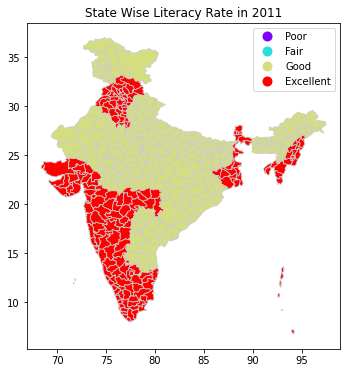

In [15]:
bins = [0, 25, 50, 75, 100]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
merged['Literacy Category'] = pd.cut(merged['Literacy Rate (Persons) - Total - 2011'], bins=bins, labels=labels, include_lowest=True)

fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='Literacy Category', cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("State Wise Literacy Rate in 2011")

plt.show()